<a href="https://colab.research.google.com/github/tewei0328/trade-backtest/blob/main/0-viz/viz1_data1_finmind_stock_option_future.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Day 14] 回測分析
### 從零開始的套牢生活 - AI股票預測系統 系列 第 14 篇
https://ithelp.ithome.com.tw/m/articles/10267871?fbclid=IwAR0GdoJVPIJ6VfcSdAfJzWAgHoaYahPsyBVIAY9NzjhNIfmmWHfsKYJC7Os

# 引入函式庫

In [1]:
# ! pip install backtesting
import datetime
import warnings

import pandas as pd
import requests
#from backtesting import Backtest, Strategy
#from backtesting.lib import crossover
#from backtesting.test import SMA
#from pandas.core.common import SettingWithCopyWarning

#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option("display.max_columns", None)


# 取得資料
backtesting強制要求欄位名稱格式，
所以需要先轉換欄位名稱

https://finmindtrade.com/analysis/#/data/document

## 1-股票

In [2]:
stock_index = '0050'
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "start_date": datetime.datetime(2023, 4, 1, 0, 0).strftime("%Y-%m-%d"),
    "end_date": datetime.datetime(2023, 5, 13, 0, 0).strftime("%Y-%m-%d"),
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()



In [ ]:
data

In [ ]:
df1 = pd.DataFrame(data["data"])

df1.index = pd.to_datetime(df1["date"])
df1.rename(
    columns={
        "Trading_Volume": "Volume",
        "open": "Open",
        "max": "High",
        "min": "Low",
        "close": "Close",
    },
    inplace=True,
)

df1.drop(
    columns=["stock_id", "date", "Trading_money", "spread", "Trading_turnover"],
    inplace=True,
)

df1

In [4]:
df1.head()

,Volume,Open,High,Low,Close
date,,,,,
2023-04-06,8076540,120.85,121.00,120.20,121.00
2023-04-07,4623088,121.25,121.45,120.80,121.00
2023-04-10,4503497,121.25,121.65,120.90,121.00
2023-04-11,6233410,121.00,121.15,120.40,120.85
2023-04-12,3247078,120.85,120.85,120.15,120.55


<Axes: xlabel='date'>

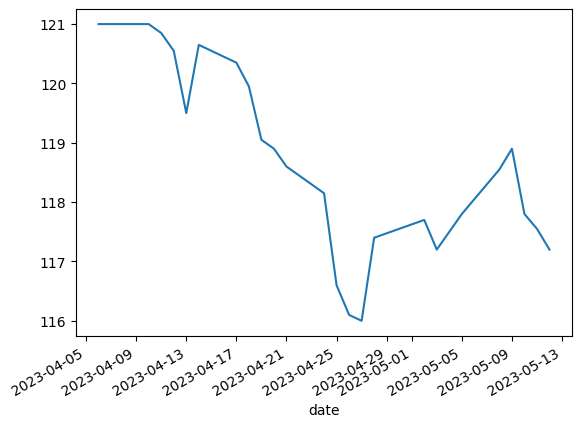

In [5]:
df1['Close'].plot()

## FinMind API 使用說明
https://finmindtrade.com/analysis/#/data/api

## 選擇權日夜盤成交資訊，包含到期月份、開高低收、漲跌幅、交易量、結算價格。
https://finmindtrade.com/analysis/#/data/document

## 2-選擇權

In [6]:
stock_index = "TXO"
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanOptionDaily",
    "start_date": datetime.datetime(2023, 4, 1, 0, 0).strftime("%Y-%m-%d"),
    "end_date": datetime.datetime(2023, 5, 13, 0, 0).strftime("%Y-%m-%d"),
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()


In [ ]:
data

In [7]:
df = pd.DataFrame(data["data"])
df.head()

,date,option_id,contract_date,strike_price,call_put,open,max,min,close,volume,settlement_price,open_interest,trading_session
0,2023-04-06,TXO,202304W1,13900.0,call,0.0,0.0,0.0,0.0,0,0.0,1,position
1,2023-04-06,TXO,202304W1,13900.0,call,0.0,0.0,0.0,0.0,0,0.0,0,after_market
2,2023-04-06,TXO,202304W1,13900.0,put,0.0,0.0,0.0,0.0,0,0.0,156,position
3,2023-04-06,TXO,202304W1,13900.0,put,0.0,0.0,0.0,0.0,0,0.0,0,after_market
4,2023-04-06,TXO,202304W1,14000.0,call,0.0,0.0,0.0,0.0,0,0.0,0,position


In [8]:
df = pd.DataFrame(data["data"])

df.index = pd.to_datetime(df["date"])
df.rename(
    columns={
        "open": "Open",
        "max": "High",
        "min": "Low",
        "close": "Close",
    },
    inplace=True,
)

df.drop(
    #columns=["option_id", "date", "settlement_price", "open_interest", "trading_session"],
    columns=["option_id", "date", "settlement_price", "open_interest"],
    inplace=True,
)

df

,contract_date,strike_price,call_put,Open,High,Low,Close,volume,trading_session
date,,,,,,,,,
2023-04-06,202304W1,13900.0,call,0.0,0.0,0.0,0.0,0,position
2023-04-06,202304W1,13900.0,call,0.0,0.0,0.0,0.0,0,after_market
2023-04-06,202304W1,13900.0,put,0.0,0.0,0.0,0.0,0,position
2023-04-06,202304W1,13900.0,put,0.0,0.0,0.0,0.0,0,after_market
2023-04-06,202304W1,14000.0,call,0.0,0.0,0.0,0.0,0,position
...,...,...,...,...,...,...,...,...,...
2023-05-12,202312,19000.0,put,0.0,0.0,0.0,0.0,0,after_market
2023-05-12,202312,19200.0,call,0.0,0.0,0.0,0.0,0,position
2023-05-12,202312,19200.0,call,13.0,13.0,7.1,7.1,5,after_market


In [9]:
def get_options(option_df, contract_period, put_or_call, strike_price, trade_period):
    
    option_df = df.loc[(df['contract_date'] == contract_period) & \
                       (df['call_put'] == put_or_call) & \
                       (df['strike_price'] == strike_price) & \
                       (df['trading_session'] == trade_period) ]
    return option_df

In [10]:
df2=get_options(df, '202305', 'call', 16000, 'position')

In [11]:
df2.head()

,contract_date,strike_price,call_put,Open,High,Low,Close,volume,trading_session
date,,,,,,,,,
2023-04-06,202305,16000.0,call,237.0,237.0,194.0,204.0,189,position
2023-04-07,202305,16000.0,call,227.0,239.0,211.0,218.0,97,position
2023-04-10,202305,16000.0,call,225.0,259.0,217.0,226.0,282,position
2023-04-11,202305,16000.0,call,207.0,267.0,207.0,246.0,218,position
2023-04-12,202305,16000.0,call,253.0,253.0,216.0,235.0,203,position


<Axes: xlabel='date'>

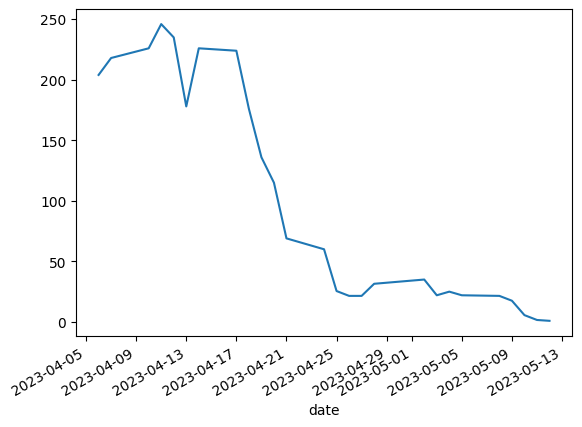

In [12]:
df2['Close'].plot()

## 3-期貨

## 期貨日成交資訊
https://finmindtrade.com/analysis/#/data/api

In [13]:
stock_index = "TX"
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanFuturesDaily",
    "start_date": datetime.datetime(2023, 4, 1, 0, 0).strftime("%Y-%m-%d"),
    "end_date": datetime.datetime(2023, 5, 13, 0, 0).strftime("%Y-%m-%d"),
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()


In [ ]:
data

In [14]:
df = pd.DataFrame(data["data"])
df.head()

,date,futures_id,contract_date,open,max,min,close,spread,spread_per,volume,settlement_price,open_interest,trading_session
0,2023-04-06,TX,202304,15780.0,15793.0,15701.0,15760.0,-104.0,-0.66,71495,15762.0,68514,position
1,2023-04-06,TX,202304,15848.0,15928.0,15810.0,15919.0,55.0,0.35,39855,0.0,0,after_market
2,2023-04-06,TX,202305,15793.0,15793.0,15678.0,15737.0,-100.0,-0.63,1362,15737.0,4392,position
3,2023-04-06,TX,202305,15808.0,15902.0,15785.0,15891.0,54.0,0.34,501,0.0,0,after_market
4,2023-04-06,TX,202306,15700.0,15700.0,15615.0,15670.0,-101.0,-0.64,172,15670.0,1221,position


In [15]:
def get_futures(option_df, contract_period, trading_session):
    
    option_df = df.loc[(df['contract_date'] == contract_period) & \
                       (df['trading_session'] == trading_session) ]
    return option_df

In [16]:
df3=get_futures(df, '202305', 'position')

In [17]:
df3.head()

,date,futures_id,contract_date,open,max,min,close,spread,spread_per,volume,settlement_price,open_interest,trading_session
2,2023-04-06,TX,202305,15793.0,15793.0,15678.0,15737.0,-100.0,-0.63,1362,15737.0,4392,position
22,2023-04-07,TX,202305,15807.0,15842.0,15772.0,15791.0,54.0,0.34,748,15793.0,4498,position
38,2023-04-10,TX,202305,15805.0,15898.0,15802.0,15823.0,30.0,0.19,1322,15823.0,4933,position
57,2023-04-11,TX,202305,15810.0,15931.0,15801.0,15897.0,74.0,0.47,1903,15894.0,5536,position
77,2023-04-12,TX,202305,15922.0,15929.0,15838.0,15895.0,1.0,0.01,1361,15895.0,5777,position


<Axes: >

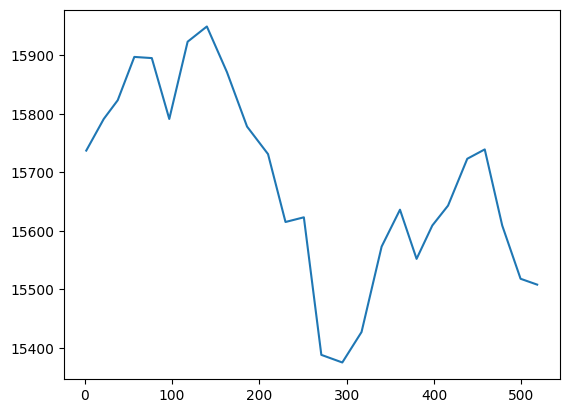

In [18]:
df3['close'].plot()

In [28]:
df3.close

2      15737.0
22     15791.0
38     15823.0
57     15897.0
77     15895.0
97     15791.0
118    15923.0
140    15949.0
163    15871.0
186    15778.0
210    15731.0
230    15615.0
251    15623.0
271    15388.0
295    15375.0
317    15427.0
340    15573.0
361    15636.0
380    15552.0
398    15609.0
416    15643.0
438    15723.0
458    15739.0
478    15609.0
499    15518.0
518    15508.0
Name: close, dtype: float64

In [25]:
df_many = pd.concat([df1.Close, df2.Close, df3.close], axis=1)


In [26]:
df_many.columns=['0050','16000call','future']

In [27]:
df_many.head()

,0050,16000call,future
2023-04-06 00:00:00,121.00,204.0,NaN
2023-04-07 00:00:00,121.00,218.0,NaN
2023-04-10 00:00:00,121.00,226.0,NaN
2023-04-11 00:00:00,120.85,246.0,NaN
2023-04-12 00:00:00,120.55,235.0,NaN


<Axes: >

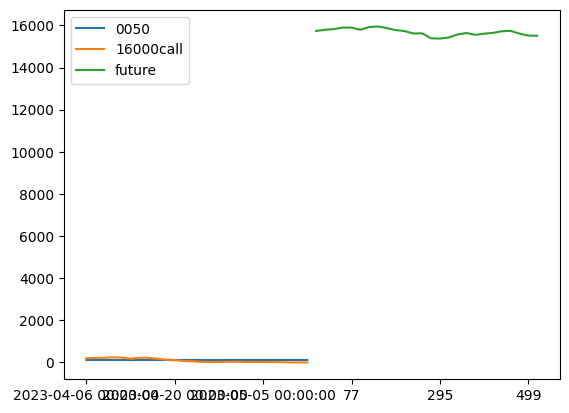

In [21]:
df_many.plot()

In [22]:
df_many['0050']=df_many['0050']/df_many.iloc[0][0]
df_many['16000call']=df_many['16000call']/df_many.iloc[0][1]
df_many['future']=df_many['future']/df_many.iloc[0][2]

In [32]:
df_many.iloc[0][2]

nan

In [23]:
df_many.head()

,0050,16000call,future
2023-04-06 00:00:00,1.000000,1.000000,NaN
2023-04-07 00:00:00,1.000000,1.068627,NaN
2023-04-10 00:00:00,1.000000,1.107843,NaN
2023-04-11 00:00:00,0.998760,1.205882,NaN
2023-04-12 00:00:00,0.996281,1.151961,NaN


<Axes: >

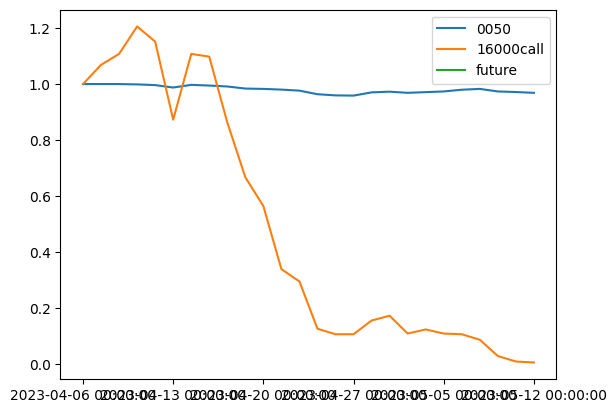

In [24]:
df_many.plot()

# 回測策略
如果快線超過慢線，表示股票進入上漲的趨勢，此時進行買空操作，分析圖表以![https://ithelp.ithome.com.tw/upload/images/20210919/20141586vhDmTPQp9Z.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586vhDmTPQp9Z.png)表示。\
如果快線跌過慢線，表示股票進入下跌的趨勢，此時進行賣空操作，分析圖表以![https://ithelp.ithome.com.tw/upload/images/20210919/20141586Y98Ntg07AE.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586Y98Ntg07AE.png)表示。\
綠色代表上一次操作的獲利情形，綠色表示獲利，綠色表示賠錢。

In [ ]:
class SmaCross(Strategy):
    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, 20)
        self.slow_line = self.I(SMA, self.data.Close, 50)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )

            self.sell()


In [ ]:
class SmaCross1(Strategy):
# 只多不空  
    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, 20)
        self.slow_line = self.I(SMA, self.data.Close, 50)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            #self.buy()
            # If ema1 crosses above ema2, buy the asset
            #self.position.close()
            self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.position.close()
            #self.sell()

# 執行策略
- cash：本金。
- commission：交易費用。
- exclusive_orders：是否禁止多頭操作(同時只能買空或賣空)。
- trade_on_close：於收盤時交易，否則預設於開盤交易。

exclusive_orders：若為True時，每次操作前自動關閉(close)上次操作。
Buy(500)、Buy(1000) -> 最後持股1000
Buy(500)、Sell(500) -> 賣空500
.
如果trade_on_close是True，市價訂單將根據當前柱的收盤價而不是下一個柱的開盤價執行。

如果hedging是True，則允許同時雙向交易。如果False，則反向訂單首先以FIFO方式關閉現有交易。

如果exclusive_orders是True，每個新訂單都會自動關閉之前的交易/頭寸，每次最多進行一次有效的交易（多頭或空頭）。

In [ ]:
test = Backtest(
    df,
    SmaCross1,
    cash=1000000,
    commission=0.004,
    exclusive_orders=True,
    trade_on_close=True,
)
result = test.run()


2015-04-17 00:00:00 Sell: Price: 142.5, Slow: [146.86 146.92 146.98 147.02 146.97], Fast: [147.725 147.475 147.325 147.225 146.675]
2015-05-18 00:00:00 Buy: Price: 146.5, Slow: [147.44 147.39 147.33 147.25 147.17], Fast: [146.725 146.925 147.075 147.05  147.25 ]
2015-05-27 00:00:00 Sell: Price: 145.0, Slow: [147.05 147.08 147.11 147.08 147.  ], Fast: [147.725 147.65  147.4   147.15  146.825]
2015-10-07 00:00:00 Buy: Price: 135.0, Slow: [128.86 128.72 128.65 128.57 128.59], Fast: [127.525 127.85  128.125 128.525 129.15 ]
2016-01-11 00:00:00 Sell: Price: 133.0, Slow: [140.45 140.38 140.28 140.23 140.16], Fast: [141.475 141.125 140.75  140.4   140.075]
2016-02-18 00:00:00 Buy: Price: 151.0, Slow: [139.78 139.83 140.   140.18 140.35], Fast: [137.95  138.5   139.225 139.975 140.85 ]
2016-05-06 00:00:00 Sell: Price: 148.0, Slow: [155.56 155.55 155.47 155.4  155.34], Fast: [157.175 156.45  155.875 155.575 155.25 ]
2016-06-13 00:00:00 Buy: Price: 162.0, Slow: [154.36 154.41 154.49 154.62 154.6

# 分析結果
將分析結果儲存，並利用預設瀏覽器開啟，
result為詳細的分析結果。

In [ ]:
test.plot()
print(result)

Start                     2015-01-05 00:00:00
End                       2023-05-05 00:00:00
Duration                   3042 days 00:00:00
Exposure Time [%]                   96.753566
Equity Final [$]                  1577378.174
Equity Peak [$]                   2758836.636
Return [%]                          57.737817
Buy & Hold Return [%]              258.422939
Return (Ann.) [%]                    5.812039
Volatility (Ann.) [%]                25.17699
Sharpe Ratio                         0.230847
Sortino Ratio                        0.355037
Calmar Ratio                         0.134267
Max. Drawdown [%]                  -43.287321
Avg. Drawdown [%]                   -6.434191
Max. Drawdown Duration     1572 days 00:00:00
Avg. Drawdown Duration      111 days 00:00:00
# Trades                                   35
Win Rate [%]                        28.571429
Best Trade [%]                      99.876171
Worst Trade [%]                    -13.989794
Avg. Trade [%]                    

In [ ]:
#test.plot(filename=f"./backtest_result/{stock_index}.html")
#print(result)

![https://ithelp.ithome.com.tw/upload/images/20210919/20141586nTsggfN69g.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586nTsggfN69g.png)


欄位 | 說明
------------- | -------------
Start                  |   起始時間
End                    |   結束時間
Duration               |   經過天數
Exposure [%]           |   投資比率
Equity Final [$]       |   最終資產
Equity Peak [$]        |   最高資產
Return [%]             |   報酬率
Buy & Hold Return [%]  |   買入持有報酬率
Max. Drawdown [%]      |   最大交易回落
Avg. Drawdown [%]      |   平均交易回落
Max. Drawdown Duration |   最長交易回落期間
Avg. Drawdown Duration |   平均交易回落期間
Win Rate [%]           |   勝率
Best Trade [%]         |   最好交易報酬率
Worst Trade [%]        |   最差交易報酬率
Avg. Trade [%]         |   平均交易報酬率
Max. Trade Duration    |   最長交易間隔
Avg. Trade Duration    |   平均交易間隔
Expectancy [%]         |   期望值
SQN                    |   系統品質指標
Sharpe Ratio           |   夏普比率
Sortino Ratio          |   索丁諾比率
Calmar Ratio           |   卡瑪比率
_strategy              |   使用策略名稱
*From https://hackmd.io/@s02260441/SkA7IWVJv*
